In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./survey_results_public.csv")

In [4]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# It is better to delete all missing rows because some columns have string values and imputation is not the best practice to go with.
df_clean = df[['JobSatisfaction', 'YearsCodedJobPast', 'Salary', 'Country', 'CompanySize', 'JobSecurity']].dropna()

In [6]:
correlations = df_clean.corr()
print(correlations)

                 JobSatisfaction    Salary
JobSatisfaction         1.000000 -0.935915
Salary                 -0.935915  1.000000


In [7]:
country_satisfaction = df_clean.groupby('Salary')['JobSatisfaction'].mean().sort_values(ascending=False)
print(country_satisfaction)

Salary
1220.862801     7.0
26213.845218    4.0
59139.784946    3.0
Name: JobSatisfaction, dtype: float64


In [8]:
company_size_satisfaction = df_clean.groupby('CompanySize')['JobSatisfaction'].mean().sort_values(ascending=False)
print(company_size_satisfaction)

CompanySize
Fewer than 10 employees    7.0
20 to 99 employees         4.0
100 to 499 employees       3.0
Name: JobSatisfaction, dtype: float64


In [9]:
job_security_satisfaction = df_clean.groupby('JobSecurity')['JobSatisfaction'].mean().sort_values(ascending=False)
print(job_security_satisfaction)

JobSecurity
Strongly agree       7.0
Strongly disagree    4.0
Agree                3.0
Name: JobSatisfaction, dtype: float64


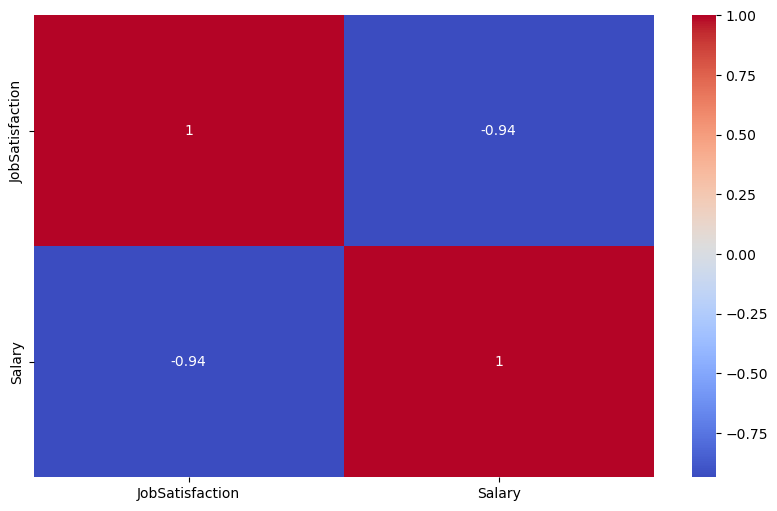

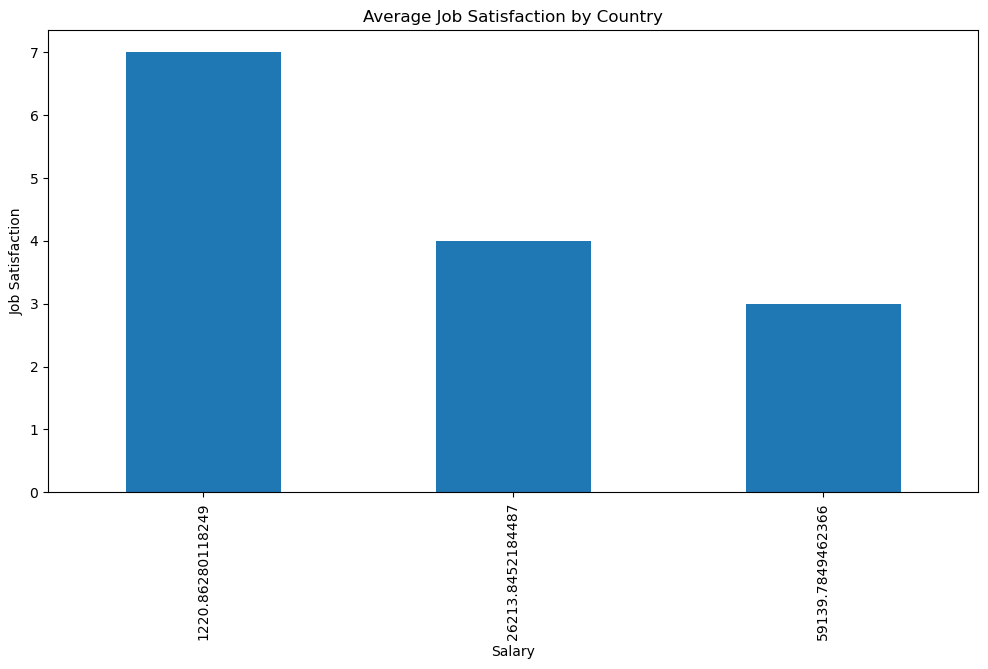

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

# Bar plot of job satisfaction by country
plt.figure(figsize=(12, 6))
country_satisfaction.plot(kind='bar')
plt.title('Average Job Satisfaction by Country')
plt.ylabel('Job Satisfaction')
plt.show()

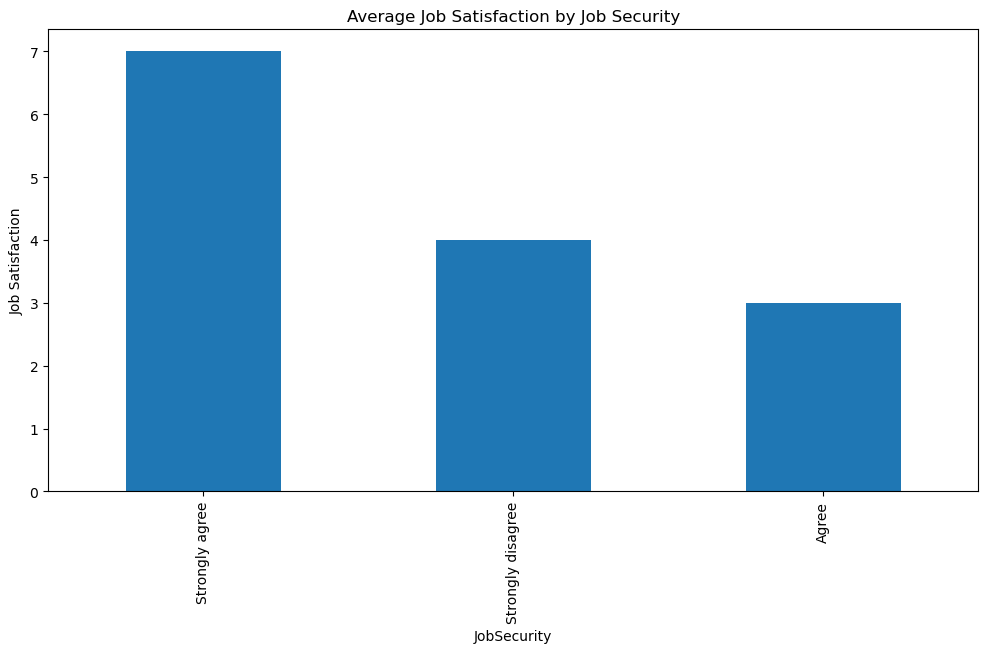

In [34]:
plt.figure(figsize=(12, 6))
job_security_satisfaction.plot(kind='bar')
plt.title('Average Job Satisfaction by Job Security')
plt.ylabel('Job Satisfaction')
plt.show()


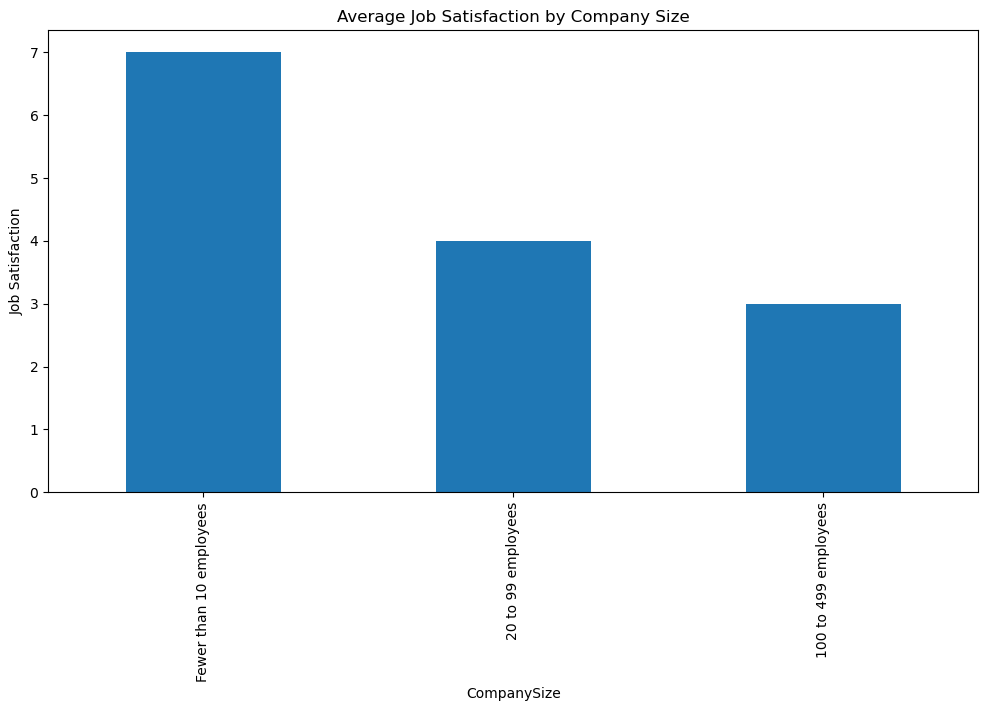

In [35]:
plt.figure(figsize=(12, 6))
company_size_satisfaction.plot(kind='bar')
plt.title('Average Job Satisfaction by Company Size')
plt.ylabel('Job Satisfaction')
plt.show()